In [105]:
# HIDDEN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import Image
%matplotlib inline
sns.set()
sns.set_context('talk')

# Least Squares Regression as a Projection

Recall that we found the optimal coefficients for linear models by optimizing their cost functions with gradient descent.

We also mentioned that least squares linear regression can be solved analytically. While gradient descent is practical, this geometric perspective will provide a deeper understanding of linear regression.

## Case Study

A wealthy client has a set of points with a clear linear pattern and asked us to come up with the best linear model for the data and a rigorous argument for how we know that our model is sound.

In [124]:
# HIDDEN
data = pd.DataFrame(
    [
        [3,2],
        [0,1],
        [-1,-2]
    ],
    columns=['x', 'y']
)
data

,x,y
0,3,2
1,0,1
2,-1,-2


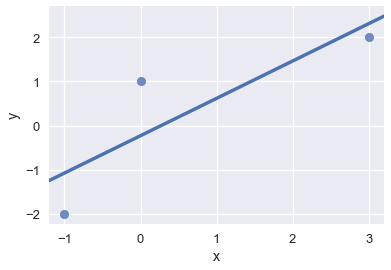

In [125]:
# HIDDEN
sns.regplot(x='x', y='y', data=data, ci=None)

We can assume that when he says he wants the best model, he wants the least error, and that the least squared error is an acceptable measure.

Recall that linear models follows the form:

$$
\begin{aligned}
f_\hat{\theta} (x_i) 
&= \hat{\theta_1} x_i + \hat{\theta_0} \\
\end{aligned}
$$

Thus, our goal is to find the $\hat{\theta}$ that results in the line with the least squared error $L(\hat{\theta}, \vec{x}, \vec{y})$:

$$
\begin{aligned}
L(\hat{\theta}, \vec{x}, \vec{y})
&= \sum_{i = 1}^{n}(y_i - f_\hat{\theta} (x_i))^2\\
&= \sum_{i = 1}^{n}(y_i - \hat{\theta_1} x_i - \hat{\theta_0})^2\\
&= \sum_{i = 1}^{n}(y_i - \begin{bmatrix} x_i & 1 \end{bmatrix}
\begin{bmatrix} 
     \hat{\theta_1} \\
     \hat{\theta_0}
\end{bmatrix} ) ^2
\end{aligned}
$$

Let's visualize this cost function.

$$
\begin{aligned}
L(\hat{\theta}, \vec{x}, \vec{y})
&=
(y_1 - \begin{bmatrix} x_i & 1 \end{bmatrix}
\begin{bmatrix} 
     \hat{\theta_1} \\
     \hat{\theta_0}
\end{bmatrix})^2  \\
&+
(y_2 - \begin{bmatrix} x_i & 1 \end{bmatrix}
\begin{bmatrix} 
     \hat{\theta_1} \\
     \hat{\theta_0}
\end{bmatrix})^2 \\
&+
(y_3 - \begin{bmatrix} x_i & 1 \end{bmatrix}
\begin{bmatrix} 
     \hat{\theta_1} \\
     \hat{\theta_0}
\end{bmatrix})^2 \\
\end{aligned}
$$

Recalling the norm for a vector: $$\Vert \vec{v} \Vert = \sqrt{v_1^2 + v_2^2 + \dots + v_n^2}$$ 

We can rewrite the loss as a matrix equation:

$$ 
\begin{aligned}
L(\hat{\theta}, \vec{x}, \vec{y})
&= \left \Vert  \qquad   
\begin{bmatrix} y_1 \\ y_2 \\ y_3  \end{bmatrix} \quad - \quad 
\begin{bmatrix} x_1 & 1\\ x_2 & 1 \\ x_3 & 1 \end{bmatrix}
\begin{bmatrix} \hat{\theta_1} \\ \hat{\theta_0} \end{bmatrix}
\qquad \right \Vert ^2 \\
&= \left \Vert  \qquad  
\vec{y} 
\quad - \quad 
X 
\begin{bmatrix} \hat{\theta_1} \\ \hat{\theta_0} \end{bmatrix}
\qquad \right \Vert ^2 \\
\end{aligned}
$$

This gives us a new perspective on what it means to minimize the least squares error. 

$X$ and $\vec{y}$ are fixed, but $\hat{\theta_1}$ and $\hat{\theta_0}$ can take on any value, so there are infinite possible vectors created by matrix multiplying $X$ and $\hat{\theta}$. Thus, we want to choose $\hat{\theta_1}$ and $\hat{\theta_2}$ such that the resulting vector is as close to $\vec{y}$ as possible.

## Geometrical Intuition

Multiplying $X$ and $\hat{\theta}$ represents adding scalar multiples of the columns of $X$: $\vec{x}$ and $\vec{1}$. Here is an intuition:

We start off with two vectors, $\vec{x}$ and $\vec{1}$.

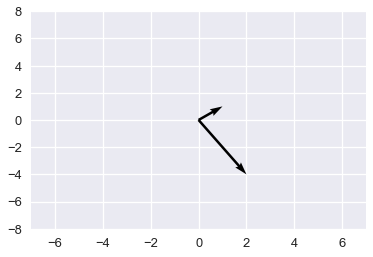

In [100]:
# HIDDEN
plt.quiver([0, 0], [0, 0], [1, 2], [1, -4], 
           angles='xy', scale_units='xy', scale=1, 
           color=['black', 'black'])
plt.xlim(-7, 7)
plt.ylim(-8, 8)
plt.show()

When $\hat{\theta_1} = 0.5$ and $\hat{\theta_0} = 2$, we add half of $x$ with two times the unit vector, resulting in a new vector.

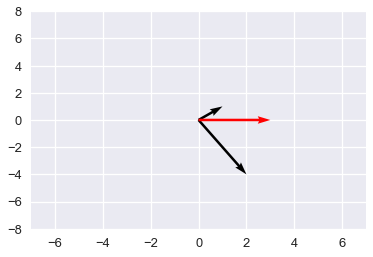

In [101]:
# HIDDEN
plt.quiver([0, 0, 0], [0, 0, 0], [1, 2, 3], [1, -4, 0], 
           angles='xy', scale_units='xy', scale=1, 
           color=['black', 'black', 'red'])
plt.xlim(-7, 7)
plt.ylim(-8, 8)
plt.show()

When $\hat{\theta_1} = -1$ and $\hat{\theta_0} = 3$, we add $-1$ times $x$ with $3$ times the unit vector, resulting in yet another vector.

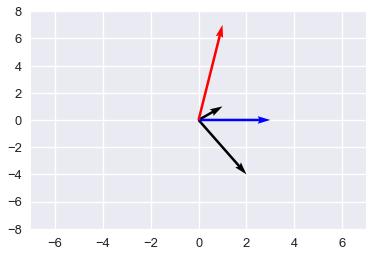

In [95]:
# HIDDEN
plt.quiver([0, 0, 0, 0], [0, 0, 0, 0], [1, 2, 3, 1], [1, -4, 0, 7], 
           angles='xy', scale_units='xy', scale=1, 
           color=['black', 'black', 'blue', 'red'])
plt.xlim(-7, 7)
plt.ylim(-8, 8)
plt.show()

With $\hat{\theta_1} = -1$ and $\hat{\theta_0} = -2$, we get:

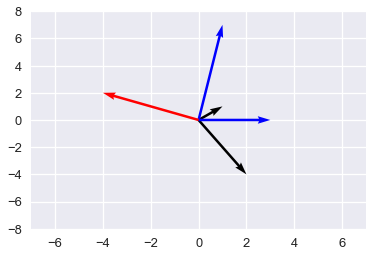

In [102]:
# HIDDEN
plt.quiver([0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [1, 2, 3, 1, -4], [1, -4, 0, 7, 2], 
           angles='xy', scale_units='xy', scale=1, 
           color=['black', 'black', 'blue', 'blue', 'red'])
plt.xlim(-7, 7)
plt.ylim(-8, 8)
plt.show()

With $\hat{\theta_1} = 1$ and $\hat{\theta_0} = -4$, we get:

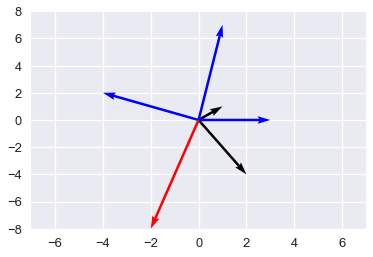

In [97]:
# HIDDEN
plt.quiver([0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [1, 2, 3, 1, -4, -2], [1, -4, 0, 7, 2, -8], 
           angles='xy', scale_units='xy', scale=1, 
           color=['black', 'black', 'blue', 'blue', 'blue', 'red'])
plt.xlim(-7, 7)
plt.ylim(-8, 8)
plt.show()

This process can go on and on, showing that when we can add any scalar multiples of vectors, we can span a space. In this case, we would create a plane as you can start to see above. Formally, this illustrates how vectors $\vec{x}$ and $\vec{1}$ span a vector space.

Recall our scatter plot and the fact that $X$ and $\vec{y}$ are defined by the data. Since no line can perfectly fit our points, we know that $\vec{y}$ is not in the plane spanned by $\vec{x}$ and $\vec{1}$. Otherwise, there would exist $\hat{\theta}$ such that $L(\hat{\theta}, \vec{x}, \vec{y})$.

Visually,

<img src="../../notebooks-images/linear_projection1.png" width="500" />

Now, we can see that to minimize $ L(\hat{\theta}, \vec{x}, \vec{y}) = \left \Vert  \vec{y} - X \hat{\theta} \right \Vert ^2$, we want $X \hat{\theta}$ to be as close to $\vec{y}$ as possible. So in the infinite set of possibilities expressed by $X \hat{\theta}$, we want to find $\hat{\theta^*}$ such that $\left \Vert  \vec{y} - X \hat{\theta^*} \right \Vert ^2 \leq \left \Vert  \vec{y} - X \hat{\theta} \right \Vert ^2 \quad \forall \hat{\theta}$.

Mathematically, we are looking for the projection of $\vec{y}$ onto the vector space spanned by the columns of $X$ because the projection $\hat{y}$ has the property of being the closest point in the vector space to the vector $y$.
<img src="../../notebooks-images/linear_projection2.png" width="500" />

To see why, consider any other point on the vector space.
<img src="../../notebooks-images/linear_projection3.png" width="500" />

In this case, it is easy to see that by the Pythagorean Theorem, any other point on the plane is farther from $\vec{y}$ than $\hat{y}$ is. The longer the distance, the higher the least squared error. Thus, the length of the perpendicular represents the least squared error.

## Linear Algebra

Since we've snuck in a lot of linear algebra concepts already, all that's left is solving for the $\hat{\theta}$ that yields our desired $\hat{y}$.

A couple things to note: 

<img src="../../notebooks-images/linear_projection5.png" width="500" />

- $\hat{y} + e = \vec{y}$
- $\vec{e}$ is perpendicular to $\vec{x}$ and $\vec{1}$
- $\hat{y} = X \hat{\theta^*}$ is the vector closest to $y$ in the vector space spanned by $\vec{x}$ and $\vec{1}$

Thus, we arrive at the equation:

$$X  \hat{\theta^*} + \vec{e} = \vec{y}$$

Left-multiplying both sides by $X^T$ (order matters in matrix multiplication):

$$X^T X  \hat{\theta^*} + X^T \vec{e} = X^T \vec{y}$$

But since $\vec{e}$ is perpendicular to the columns of $X$, $X^T \vec{e}$ is a column vector of $0$'s. Thus, we arrive at the Normal Equation:

$$X^T X  \hat{\theta^*} = X^T \vec{y}$$

From here, we can easily solve for $\hat{\theta^*}$ by left-multiplying both sides by $(X^T X)^{-1}$:

$$\hat{\theta^*} = (X^T X)^{-1} X^T \vec{y}$$

## Finishing up the Case Study

Let's return to our case study and apply what we've learned, and explain to our client why our solution is sound.

$$
\vec{y} = \begin{bmatrix} 2 \\ 1 \\ -2  \end{bmatrix} \quad X = \begin{bmatrix} 3 & 1\\ 0 & 1 \\ -1 & 1 \end{bmatrix}
$$


$$
\begin{align}
\hat{\theta^*} 
&= 
\left(
\begin{bmatrix} 3 & 0 & -1 \\ 1 & 1 & 1 \end{bmatrix}
\begin{bmatrix} 3 & 1 \\ 0 & 1 \\ -1 & 1 \end{bmatrix} 
\right)^{-1}
\begin{bmatrix} 3 & 0 & -1 \\ 1 & 1 & 1 \end{bmatrix}
\begin{bmatrix} 2 \\ 1 \\ -2  \end{bmatrix} \\
&= 
\left(
\begin{bmatrix} 10 & 2\\ 2 & 3 \end{bmatrix}
\right)^{-1}
\begin{bmatrix} 8 \\ 1 \end{bmatrix} \\
&=
\frac{1}{30-4}
\begin{bmatrix} 3 & -2\\ -2 & 10 \end{bmatrix}
\begin{bmatrix} 8 \\ 1 \end{bmatrix} \\
&=
\frac{1}{26}
\begin{bmatrix} 22\\ -6 \end{bmatrix}\\
&=
\begin{bmatrix} \frac{11}{13}\\ - \frac{3}{13} \end{bmatrix}
\end{align}
$$

We have analytically found that best model for least squares regression is $f_\hat{\theta} (x_i) = \frac{11}{13} x_i - \frac{3}{13}$.